<a href="https://colab.research.google.com/github/claarr/DataAnalyst-GreatEdu/blob/main/Final_Project_Sansevieria_(GreatEdu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sansevieria**
### **Project Leader** : Clarita Putri Anggraeni
### **Analyst** : Birru Asia Rayani, Agung Bima Wahyu Abadi
### **Visualizer** : Isdanial Sabian Shaputra, Ameliana Hanifa Putria

# **PUSTAKA DATA**

In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Membaca data
import pandas as pd
df = pd.read_excel('dataset_statistik perumahan dan lingkungan.xlsx')
df.head()

,Unnamed: 0,pctg_milik_sendiri,pctg_kontrak,pctg_bebas_sewa,pctg_dinas,pctg_cuci_tangan_Air Kemasan\nBermerk,pctg_cuci_tangan_Air Isi Ulang,pctg_cuci_tangan_Leding,pctg_cuci_tangan_Sumur Bor/\nPompa,pctg_cuci_tangan_Sumur Terlindung,...,pctg_rumah_layak_huni,pctg_rumah_kumuh,rata_rata_pengeluaran_sewa_perkapita_per_bulan,rata_rata_pengeluaran_listrik_perkapita_per_bulan,rata_rata_pengeluaran_air_perkapita_per_bulan,rata_rata_pengeluaran_bahan_bakar_perkapita_per_bulan,rata_rata_pengeluaran_gas_perkapita_per_bulan,proporsi_pengeluaran_rumah,proporsi_pengeluaran_listrik,proporsi_pengeluaran_air
0,Aceh,84.12,4.40,9.93,1.53,1.30,42.22,7.79,9.19,24.58,...,65.91,5.11,4420.0,28363,3384,12830,10997,0.36,2.31,0.28
1,Sumatera Utara,71.46,9.72,16.00,2.81,2.31,36.94,11.66,23.73,9.27,...,70.95,5.75,10563.0,38979,6400,15035,12776,0.81,2.99,0.49
2,Sumatera Barat,72.61,7.24,18.74,1.40,0.91,42.85,11.42,6.48,16.87,...,59.85,4.51,8167.0,35648,5742,15362,11744,0.58,2.52,0.41
3,R i a u,77.56,8.31,9.79,4.25,1.73,53.21,0.47,13.97,10.15,...,71.53,3.48,10217.0,53084,1874,15554,13789,0.67,3.48,0.12
4,J a m b i,87.28,3.40,8.15,1.18,2.55,23.94,10.73,6.97,28.86,...,64.12,3.71,3461.0,44247,5383,19261,16021,0.24,3.11,0.38


# **EDA (Exploratory Data Analysis)**

## **Modifikasi Nama Kolom**

In [ ]:
# Menngecek nama kolom
df.columns

Index(['Unnamed: 0', 'pctg_milik_sendiri', 'pctg_kontrak', 'pctg_bebas_sewa',
       'pctg_dinas', 'pctg_cuci_tangan_Air Kemasan\nBermerk',
       'pctg_cuci_tangan_Air Isi Ulang', 'pctg_cuci_tangan_Leding',
       'pctg_cuci_tangan_Sumur Bor/\nPompa',
       'pctg_cuci_tangan_Sumur Terlindung',
       'pctg_cuci_tangan_Sumur Tak Terlindung', 'pctg_Mata Air Terlindung',
       'pctg_cuci_tangan_Mata Air Tak Terlindung',
       'pctg_cuci_tangan_Air Permukaan (Sungai/ Danau/ Waduk/ Kolam/\nIrigasi)',
       'pctg_cuci_tangan_Air Hujan', 'pctg_air_minum_layak',
       'pctg_listrik_pln', 'pctg_rumah_layak_huni', 'pctg_rumah_kumuh',
       'rata_rata_pengeluaran_sewa_perkapita_per_bulan',
       'rata_rata_pengeluaran_listrik_perkapita_per_bulan',
       'rata_rata_pengeluaran_air_perkapita_per_bulan',
       'rata_rata_pengeluaran_bahan_bakar_perkapita_per_bulan',
       'rata_rata_pengeluaran_gas_perkapita_per_bulan',
       'proporsi_pengeluaran_rumah', 'proporsi_pengeluaran_listrik',


In [ ]:
# Mengubah nama kolom
df.rename(columns={'Unnamed: 0':'provinsi',
                     'pctg_milik_sendiri':'rumah_milik_sendiri',
                     'pctg_kontrak':'rumah_kontrak',
                     'pctg_bebas_sewa':'rumah_sewa',
                     'pctg_dinas':'rumah_dinas',
                     'pctg_cuci_tangan_Air Kemasan\nBermerk':'air_kemasan',
                     'pctg_cuci_tangan_Air Isi Ulang':'air_isi_ulang',
                     'pctg_cuci_tangan_Leding':'air_leding',
                     'pctg_cuci_tangan_Sumur Bor/\nPompa':'air_sumur_pompa',
                     'pctg_cuci_tangan_Sumur Terlindung':'air_sumur_terlindungi',
                     'pctg_cuci_tangan_Sumur Tak Terlindung':'air_sumur_takTerlindungi',
                     'pctg_Mata Air Terlindung':'air_terlindungi',
                     'pctg_cuci_tangan_Mata Air Tak Terlindung':'air_takTerlindungi',
                     'pctg_cuci_tangan_Air Permukaan (Sungai/ Danau/ Waduk/ Kolam/\nIrigasi)':'air_permukaan',
                     'pctg_cuci_tangan_Air Hujan':'air_hujan',
                     'pctg_air_minum_layak':'air_minum_layak',
                     'pctg_listrik_pln':'listrik_pln',
                     'pctg_rumah_layak_huni':'rumah_layak_huni',
                     'pctg_rumah_kumuh':'rumah_kumuh',
                     'rata_rata_pengeluaran_sewa_perkapita_per_bulan':'pengeluaran_sewa',
                     'rata_rata_pengeluaran_listrik_perkapita_per_bulan':'pengeluaran_listrik',
                     'rata_rata_pengeluaran_air_perkapita_per_bulan':'pengeluaran_air',
                     'rata_rata_pengeluaran_bahan_bakar_perkapita_per_bulan':'pengeluaran_bahanBakar',
                     'rata_rata_pengeluaran_gas_perkapita_per_bulan':'pengeluaran_gas'}, inplace=True)
df.columns

Index(['provinsi', 'rumah_milik_sendiri', 'rumah_kontrak', 'rumah_sewa',
       'rumah_dinas', 'air_kemasan', 'air_isi_ulang', 'air_leding',
       'air_sumur_pompa', 'air_sumur_terlindungi', 'air_sumur_takTerlindungi',
       'air_terlindungi', 'air_takTerlindungi', 'air_permukaan', 'air_hujan',
       'air_minum_layak', 'listrik_pln', 'rumah_layak_huni', 'rumah_kumuh',
       'pengeluaran_sewa', 'pengeluaran_listrik', 'pengeluaran_air',
       'pengeluaran_bahanBakar', 'pengeluaran_gas',
       'proporsi_pengeluaran_rumah', 'proporsi_pengeluaran_listrik',
       'proporsi_pengeluaran_air'],
      dtype='object')

## **Memperbaiki Data Provinsi**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   provinsi                      34 non-null     object 
 1   rumah_milik_sendiri           34 non-null     float64
 2   rumah_kontrak                 34 non-null     float64
 3   rumah_sewa                    34 non-null     float64
 4   rumah_dinas                   32 non-null     float64
 5   air_kemasan                   34 non-null     float64
 6   air_isi_ulang                 34 non-null     float64
 7   air_leding                    34 non-null     float64
 8   air_sumur_pompa               34 non-null     float64
 9   air_sumur_terlindungi         34 non-null     float64
 10  air_sumur_takTerlindungi      32 non-null     float64
 11  air_terlindungi               33 non-null     float64
 12  air_takTerlindungi            31 non-null     float64
 13  air_per

In [ ]:
df['provinsi'] = df['provinsi'].replace({'R i a u':'Riau',
                                         'J a m b i':'Jambi',
                                         'Kep. Bangka Belitung':'Kepulauan Bangka Belitung',
                                         'Kep. Riau':'Kepulauan Riau',
                                         'DI Yogyakarta':'Daerah Istimewa Yogyakarta',
                                         'B a l i':'Bali'})
df['provinsi']

0                           Aceh
1                 Sumatera Utara
2                 Sumatera Barat
3                           Riau
4                          Jambi
5               Sumatera Selatan
6                       Bengkulu
7                        Lampung
8      Kepulauan Bangka Belitung
9                 Kepulauan Riau
10                   DKI Jakarta
11                    Jawa Barat
12                   Jawa Tengah
13    Daerah Istimewa Yogyakarta
14                    Jawa Timur
15                        Banten
16                          Bali
17           Nusa Tenggara Barat
18           Nusa Tenggara Timur
19              Kalimantan Barat
20             Kalimantan Tengah
21            Kalimantan Selatan
22              Kalimantan Timur
23              Kalimantan Utara
24                Sulawesi Utara
25               Sulawesi Tengah
26              Sulawesi Selatan
27             Sulawesi Tenggara
28                     Gorontalo
29                Sulawesi Barat
30        

## **Mengubah Tipe Data Provinsi Menjadi Numerik**
Untuk mempermudah clustering dan korelasi

In [ ]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   provinsi                      34 non-null     object 
 1   rumah_milik_sendiri           34 non-null     float64
 2   rumah_kontrak                 34 non-null     float64
 3   rumah_sewa                    34 non-null     float64
 4   rumah_dinas                   32 non-null     float64
 5   air_kemasan                   34 non-null     float64
 6   air_isi_ulang                 34 non-null     float64
 7   air_leding                    34 non-null     float64
 8   air_sumur_pompa               34 non-null     float64
 9   air_sumur_terlindungi         34 non-null     float64
 10  air_sumur_takTerlindungi      32 non-null     float64
 11  air_terlindungi               33 non-null     float64
 12  air_takTerlindungi            31 non-null     float64
 13  air_per

In [ ]:
df['provinsi'].head()

0              Aceh
1    Sumatera Utara
2    Sumatera Barat
3              Riau
4             Jambi
Name: provinsi, dtype: object

In [ ]:
# Mengubah tipe data pada kolom provinsi menjadi numerik
le = LabelEncoder()

df['provinsi'] = le.fit_transform(df['provinsi'])
df['provinsi']

0      0
1     33
2     31
3     25
4      7
5     32
6      3
7     18
8     16
9     17
10     4
11     8
12     9
13     5
14    10
15     2
16     1
17    21
18    22
19    11
20    13
21    12
22    14
23    15
24    30
25    28
26    27
27    29
28     6
29    26
30    19
31    20
32    24
33    23
Name: provinsi, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   provinsi                      34 non-null     int64  
 1   rumah_milik_sendiri           34 non-null     float64
 2   rumah_kontrak                 34 non-null     float64
 3   rumah_sewa                    34 non-null     float64
 4   rumah_dinas                   32 non-null     float64
 5   air_kemasan                   34 non-null     float64
 6   air_isi_ulang                 34 non-null     float64
 7   air_leding                    34 non-null     float64
 8   air_sumur_pompa               34 non-null     float64
 9   air_sumur_terlindungi         34 non-null     float64
 10  air_sumur_takTerlindungi      32 non-null     float64
 11  air_terlindungi               33 non-null     float64
 12  air_takTerlindungi            31 non-null     float64
 13  air_per

## **Mengecek Data Duplikat**

In [ ]:
# Mengecek data duplikat
df.duplicated().sum()

0

## **Mengisi Missing Value (NaN)**
Mengisi data menggunakan nilai median

In [ ]:
# Melihat jumlah data yang null di tiap kolom
df.isnull().sum()

provinsi                        0
rumah_milik_sendiri             0
rumah_kontrak                   0
rumah_sewa                      0
rumah_dinas                     2
air_kemasan                     0
air_isi_ulang                   0
air_leding                      0
air_sumur_pompa                 0
air_sumur_terlindungi           0
air_sumur_takTerlindungi        2
air_terlindungi                 1
air_takTerlindungi              3
air_permukaan                   5
air_hujan                       7
air_minum_layak                 0
listrik_pln                     0
rumah_layak_huni                0
rumah_kumuh                     0
pengeluaran_sewa                2
pengeluaran_listrik             0
pengeluaran_air                 0
pengeluaran_bahanBakar          0
pengeluaran_gas                 0
proporsi_pengeluaran_rumah      0
proporsi_pengeluaran_listrik    0
proporsi_pengeluaran_air        0
dtype: int64

In [ ]:
# Melihat statistik deskriptif dari kolom yang memiliki null
df[['rumah_dinas',
    'air_sumur_takTerlindungi',
    'air_terlindungi',
    'air_takTerlindungi',
    'air_permukaan',
    'air_hujan',
    'pengeluaran_sewa']].describe()

,rumah_dinas,air_sumur_takTerlindungi,air_terlindungi,air_takTerlindungi,air_permukaan,air_hujan,pengeluaran_sewa
count,32.000000,32.000000,33.000000,31.000000,29.000000,27.000000,32.000000
mean,1.277188,3.598750,9.729394,2.689355,2.430345,5.827407,9678.937500
std,1.217171,3.902532,7.478018,3.558166,2.580792,8.939379,10102.973698
min,0.070000,0.000000,0.910000,0.540000,0.000000,0.120000,1508.000000
25%,0.355000,1.697500,3.670000,1.140000,0.320000,0.645000,3360.750000
50%,0.985000,2.545000,8.560000,1.650000,1.350000,2.570000,5510.500000
75%,1.642500,3.587500,13.190000,2.795000,3.440000,6.815000,12776.500000
max,5.360000,20.720000,30.040000,20.190000,8.070000,42.080000,49559.000000


In [ ]:
# Mengisi data yang null dengan nilai median
df.fillna(df.median().round(2), inplace=True)
df[['rumah_dinas',
    'air_sumur_takTerlindungi',
    'air_terlindungi',
    'air_takTerlindungi',
    'air_permukaan',
    'air_hujan',
    'pengeluaran_sewa']]

,rumah_dinas,air_sumur_takTerlindungi,air_terlindungi,air_takTerlindungi,air_permukaan,air_hujan,pengeluaran_sewa
0,1.53,2.86,8.06,1.20,2.31,0.33,4420.0
1,2.81,2.33,8.25,1.94,0.91,2.57,10563.0
2,1.40,3.16,10.58,5.11,1.35,1.23,8167.0
3,4.25,1.61,2.41,0.85,0.32,15.27,10217.0
4,1.18,10.42,4.05,1.65,3.44,7.28,3461.0
5,0.60,4.39,2.61,1.29,1.91,5.95,3391.0
6,1.00,20.72,7.26,3.30,1.26,2.57,4238.0
7,0.18,10.76,4.27,3.02,0.77,0.19,3184.0
8,0.99,5.21,0.91,0.54,1.35,2.57,5341.0
9,0.55,2.65,1.35,1.08,0.11,2.57,31118.0


In [ ]:
# Mengecek lagi kolom apakah masih ada yang null
df.isnull().sum()

provinsi                        0
rumah_milik_sendiri             0
rumah_kontrak                   0
rumah_sewa                      0
rumah_dinas                     0
air_kemasan                     0
air_isi_ulang                   0
air_leding                      0
air_sumur_pompa                 0
air_sumur_terlindungi           0
air_sumur_takTerlindungi        0
air_terlindungi                 0
air_takTerlindungi              0
air_permukaan                   0
air_hujan                       0
air_minum_layak                 0
listrik_pln                     0
rumah_layak_huni                0
rumah_kumuh                     0
pengeluaran_sewa                0
pengeluaran_listrik             0
pengeluaran_air                 0
pengeluaran_bahanBakar          0
pengeluaran_gas                 0
proporsi_pengeluaran_rumah      0
proporsi_pengeluaran_listrik    0
proporsi_pengeluaran_air        0
dtype: int64

## **Distribusi Data**

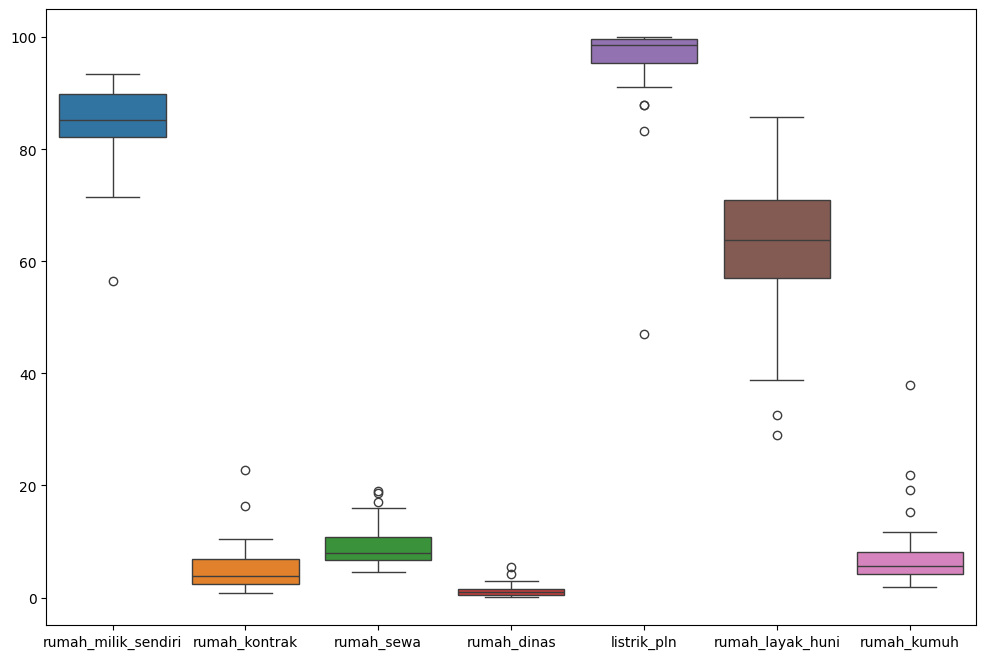

In [ ]:
# Plot boxplot 1
plt.figure(figsize=(12, 8))
sns.boxplot(df[['rumah_milik_sendiri', 'rumah_kontrak', 'rumah_sewa',
       'rumah_dinas', 'listrik_pln', 'rumah_layak_huni', 'rumah_kumuh']])

# Simpan gambar ke file
plt.savefig('boxplot1.png')
plt.show()

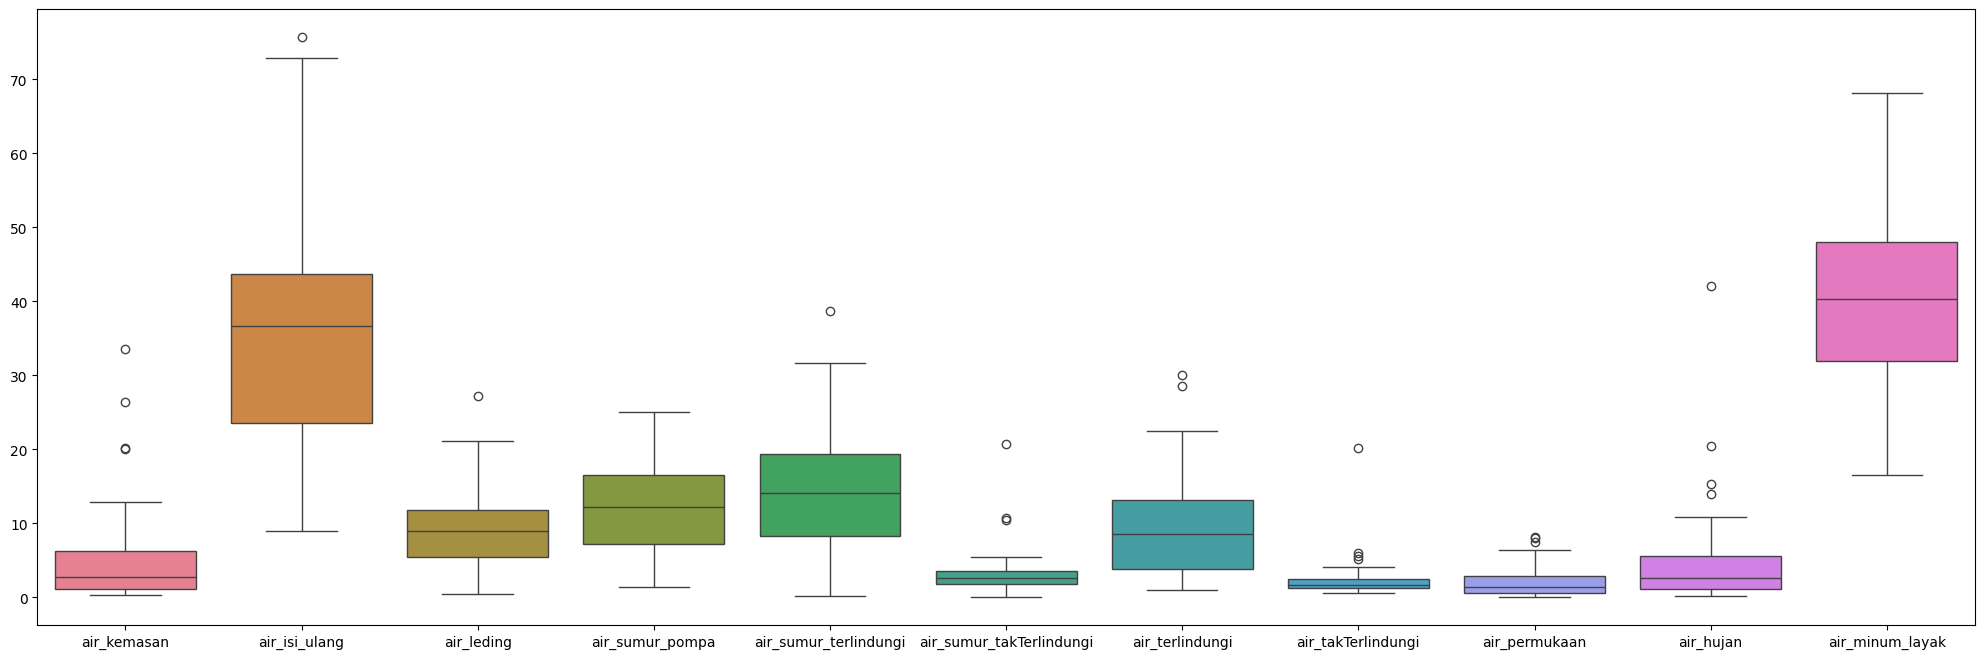

In [ ]:
# Plot boxplot 2
plt.figure(figsize=(25, 8))
sns.boxplot(df[['air_kemasan', 'air_isi_ulang', 'air_leding',
       'air_sumur_pompa', 'air_sumur_terlindungi', 'air_sumur_takTerlindungi',
       'air_terlindungi', 'air_takTerlindungi', 'air_permukaan', 'air_hujan',
       'air_minum_layak']])

# Simpan gambar ke file
plt.savefig('boxplot2.png')
plt.show()

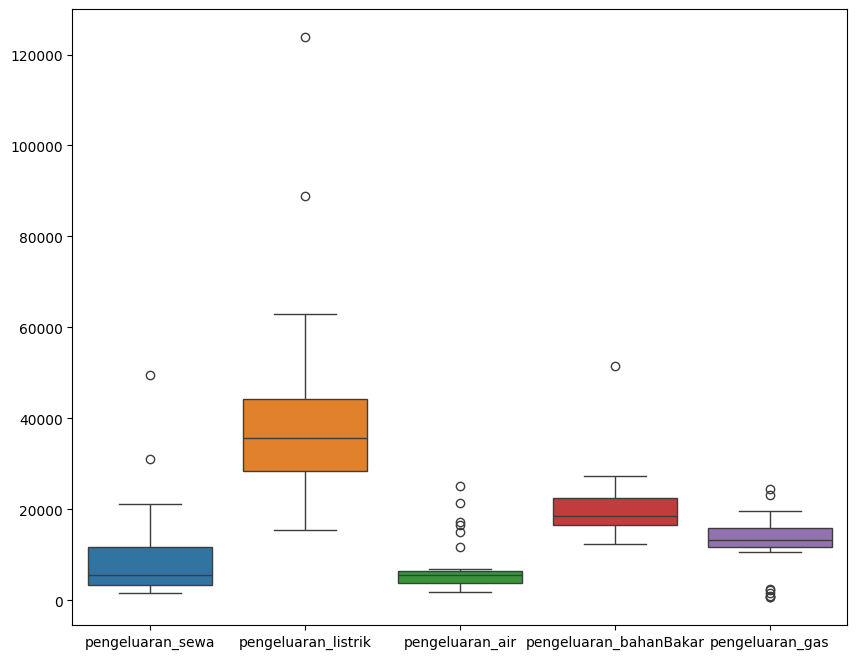

In [ ]:
# Plot boxplot 3
plt.figure(figsize=(10, 8))
sns.boxplot(df[['pengeluaran_sewa', 'pengeluaran_listrik',
       'pengeluaran_air', 'pengeluaran_bahanBakar',
       'pengeluaran_gas']])

# Simpan gambar ke file
plt.savefig('boxplot3.png')
plt.show()

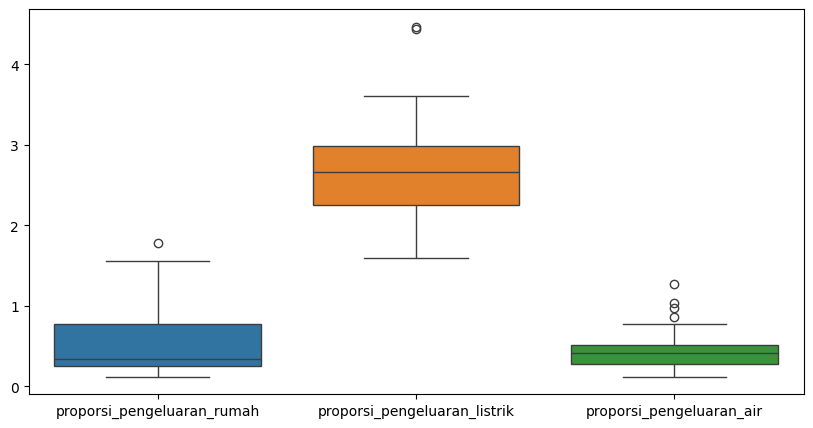

In [ ]:
# Plot boxplot 4
plt.figure(figsize=(10, 5))
sns.boxplot(df[['proporsi_pengeluaran_rumah','proporsi_pengeluaran_listrik', 'proporsi_pengeluaran_air']])

# Simpan gambar ke file
plt.savefig('boxplot4.png')
plt.show()

# **KORELASI**

## **Korelasi**

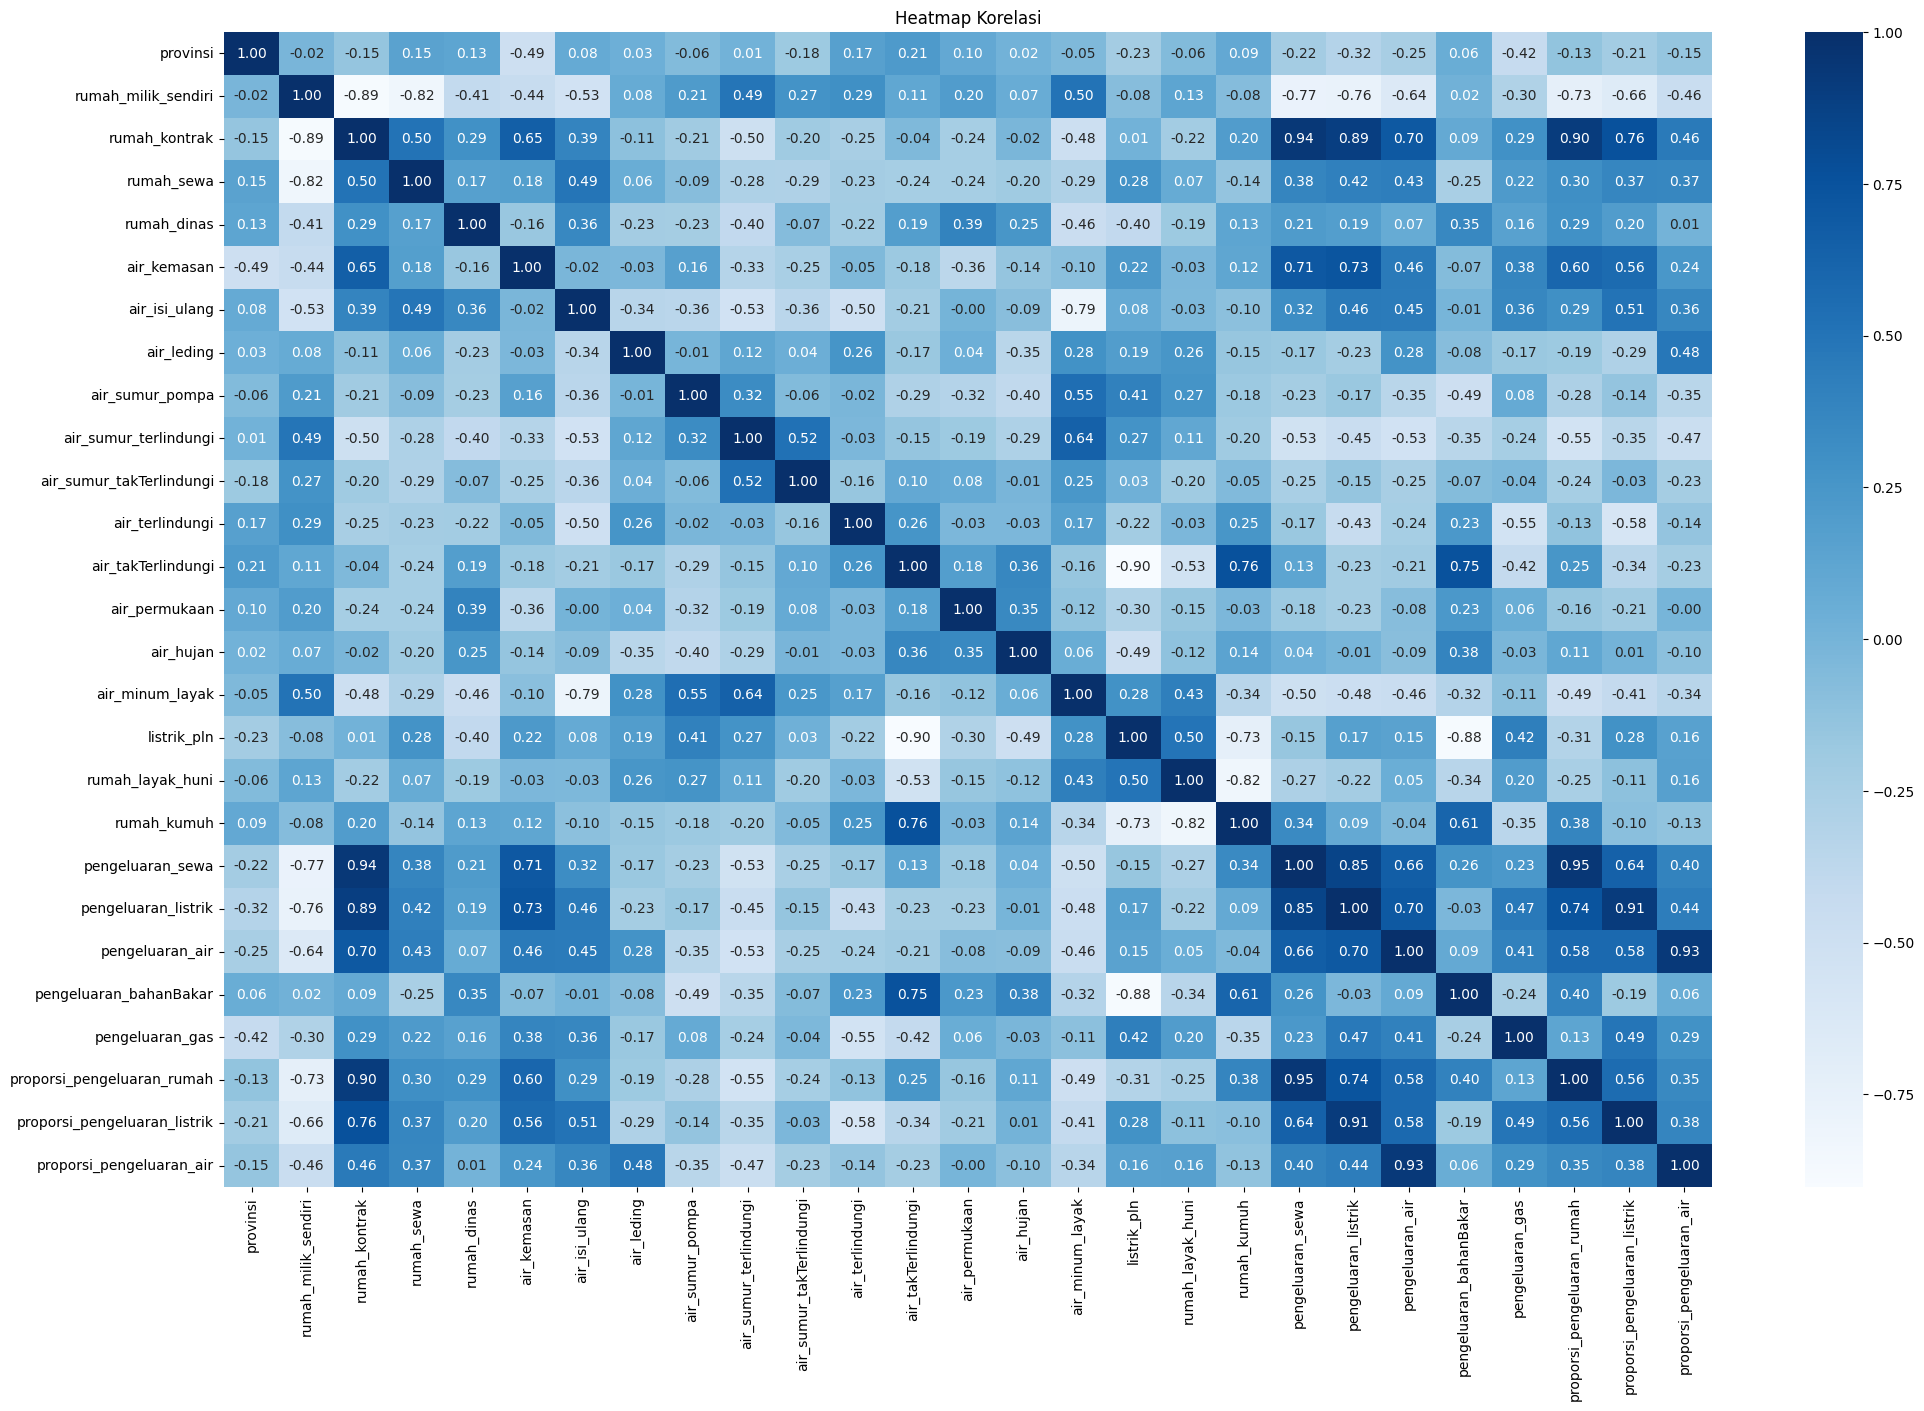

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(24, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap Korelasi')

# Simpan gambar ke file
plt.savefig('correlation.png')
plt.show()

## **Hipotesis Testing**

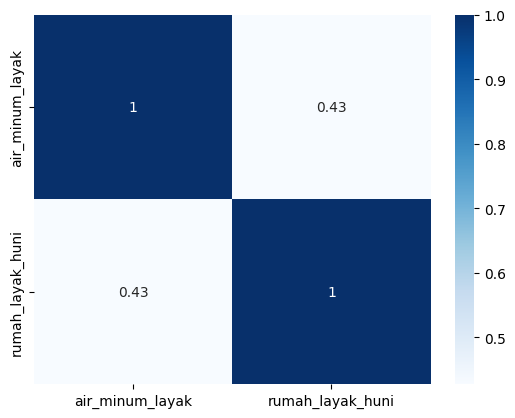

In [ ]:
sns.heatmap(df[['air_minum_layak','rumah_layak_huni']].corr(), cmap='Blues', annot=True)

# Simpan gambar ke file
plt.savefig('correlation2.png')

In [ ]:
# 2 sample t-test
stats.ttest_ind(a = df['air_minum_layak'], b = df['rumah_layak_huni'])

TtestResult(statistic=-7.430469680300975, pvalue=2.766329174226888e-10, df=66.0)

Dilakukan Hypothesis Testing untuk menguji apakah ada hubungan antara rumah layak huni dan air minum layak,

- **H0 : Tidak ada hubungan yang signifikan antara rumah layak huni dan akses ke air minum layak.**

- **H1: Ada hubungan yang signifikan antara rumah layak huni dan akses ke air minum layak.**

Diperoleh P-value=2.7..., maka **H0** ditolak dan **H1** diterima.

P-value=2.7... menunjukkan adanya hubungan yang signifikan antara rumah layak huni dan akses ke air minum layak.



# **MODELLING**

## **Pemilihan Variabel Untuk Clustering**

In [ ]:
# Hanya menggunakan dua variabel yang diinginkan untuk clustering
selected_features = df[['air_minum_layak', 'rumah_layak_huni']]

## **Menentukan Jumlah Cluster (Elbow Method)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

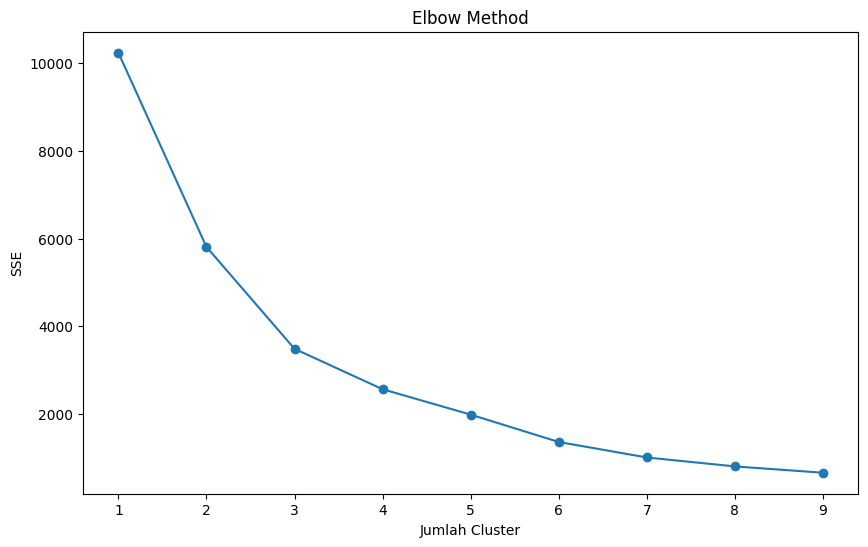

In [ ]:
# Implementasi Metode Elbow
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
k_range = range(1, 10)

# Cek nilai SSE setiap k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    sse.append(kmeans.inertia_)

# Plot SSE untuk Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Simpan gambar ke file
plt.savefig('elbow_method.png')
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=10231.462570588235
k=2; SSE=5808.79008937729
k=3; SSE=3487.3514973214283
k=4; SSE=2567.005091794872
k=5; SSE=1989.0608114718618
k=6; SSE=1365.7747257142855
k=7; SSE=1012.9856065476188
k=8; SSE=809.1465333333332
k=9; SSE=665.4492079365077


In [ ]:
# Lattih model KMeans dengan k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(selected_features)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1], dtype=int32)

In [ ]:
# Dapatkan label klaster dan tambahkan ke dataframe
df['cluster'] = kmeans.labels_

## **Visualisasi Clustering (Air Minum Layak & Rumah Layak Huni)**

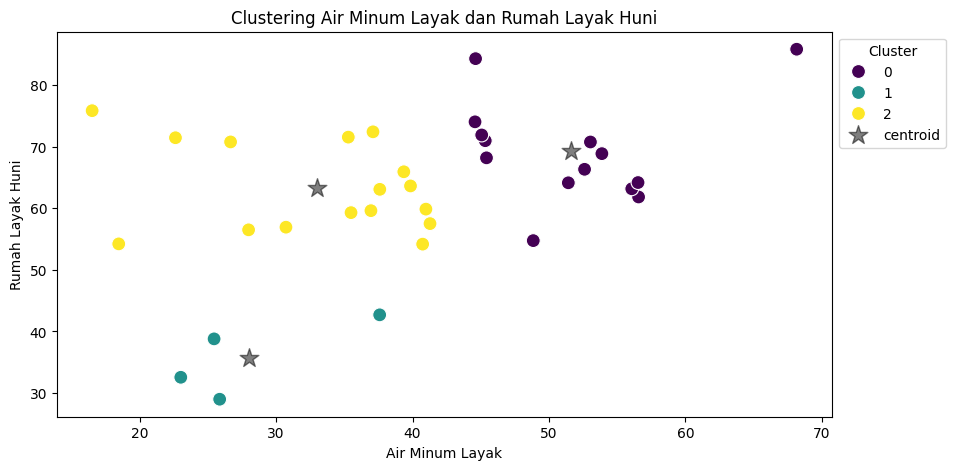

In [ ]:
# Visualisasi plot hasil klaster
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='air_minum_layak', y='rumah_layak_huni', s=100, hue='cluster', palette='viridis')

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='black', s=200, alpha=0.5, label='centroid')

plt.title('Clustering Air Minum Layak dan Rumah Layak Huni')
plt.xlabel('Air Minum Layak')
plt.ylabel('Rumah Layak Huni')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')

# Simpan gambar ke file
plt.savefig('clustering.png', bbox_inches='tight')
plt.show()

## **Menampilkan Nilai Centroid Pada Tiap Cluster**

In [ ]:
# Mendapatkan nilai centroid dari model KMeans
centroid_values = kmeans.cluster_centers_

# Mengubah nilai centroid menjadi DataFrame untuk kemudahan visualisasi
centroid_df = pd.DataFrame(centroid_values, columns=['air_minum_layak', 'rumah_layak_huni'])

# Tambahkan kolom cluster untuk menandai cluster mana yang sesuai dengan nilai centroid
k = kmeans.n_clusters
centroid_df['cluster'] = range(k)

# Tampilkan nilai centroid dalam DataFrame
print("Nilai Centroid:")
centroid_df

Nilai Centroid:


,air_minum_layak,rumah_layak_huni,cluster
0,51.582143,69.210714,0
1,27.977500,35.770000,1
2,32.974375,63.282500,2


# **Export Data**

In [ ]:
# Mengubah kembali data provinsi menjadi data yang sebelum di encoding

df['provinsi'] = le.inverse_transform(df['provinsi'])
df['provinsi']

0                           Aceh
1                 Sumatera Utara
2                 Sumatera Barat
3                           Riau
4                          Jambi
5               Sumatera Selatan
6                       Bengkulu
7                        Lampung
8      Kepulauan Bangka Belitung
9                 Kepulauan Riau
10                   DKI Jakarta
11                    Jawa Barat
12                   Jawa Tengah
13    Daerah Istimewa Yogyakarta
14                    Jawa Timur
15                        Banten
16                          Bali
17           Nusa Tenggara Barat
18           Nusa Tenggara Timur
19              Kalimantan Barat
20             Kalimantan Tengah
21            Kalimantan Selatan
22              Kalimantan Timur
23              Kalimantan Utara
24                Sulawesi Utara
25               Sulawesi Tengah
26              Sulawesi Selatan
27             Sulawesi Tenggara
28                     Gorontalo
29                Sulawesi Barat
30        

In [ ]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('df_sansevieria.csv', index=False)

# **BEBERAPA ALGORITMA CLUSTERING**

## **Agglomerative Hierarchical Clustering**

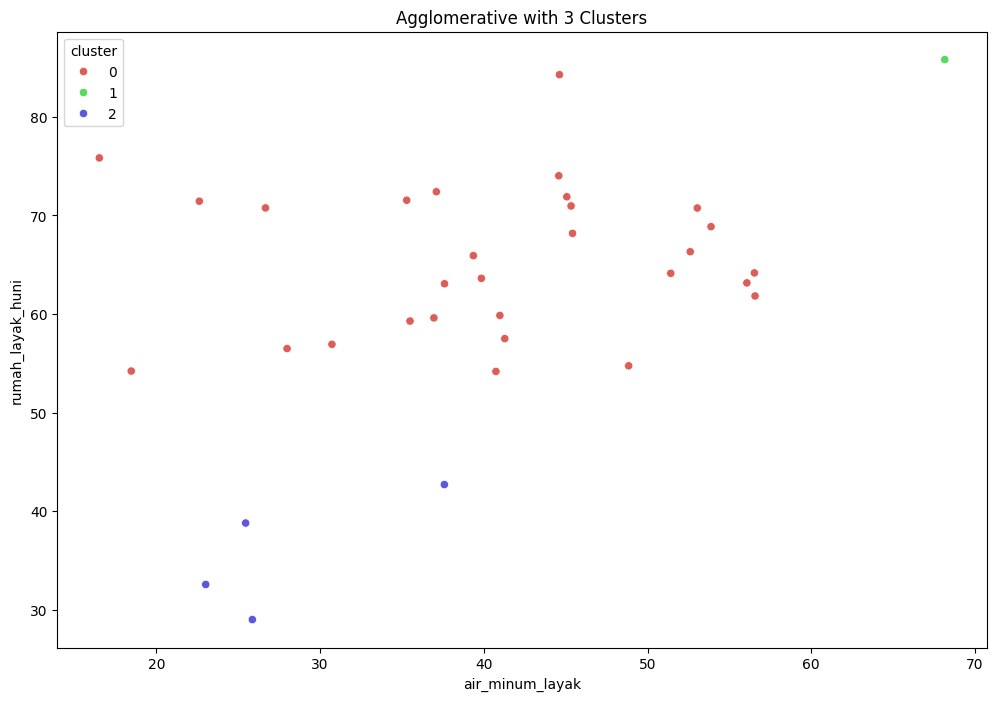

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat model Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
df['cluster'] = agglom.fit_predict(df[['air_minum_layak', 'rumah_layak_huni']])

# Plot klaster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='air_minum_layak', y='rumah_layak_huni', hue='cluster', palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters')
plt.show()

In [ ]:
# Menghitung matriks jarak
dist = distance_matrix(df[['air_minum_layak', 'rumah_layak_huni']], df[['air_minum_layak', 'rumah_layak_huni']])

In [ ]:
# Membuat linkage matrix
Z = hierarchy.linkage(dist, 'average')

<ipython-input-34-e912d0f7be7f>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


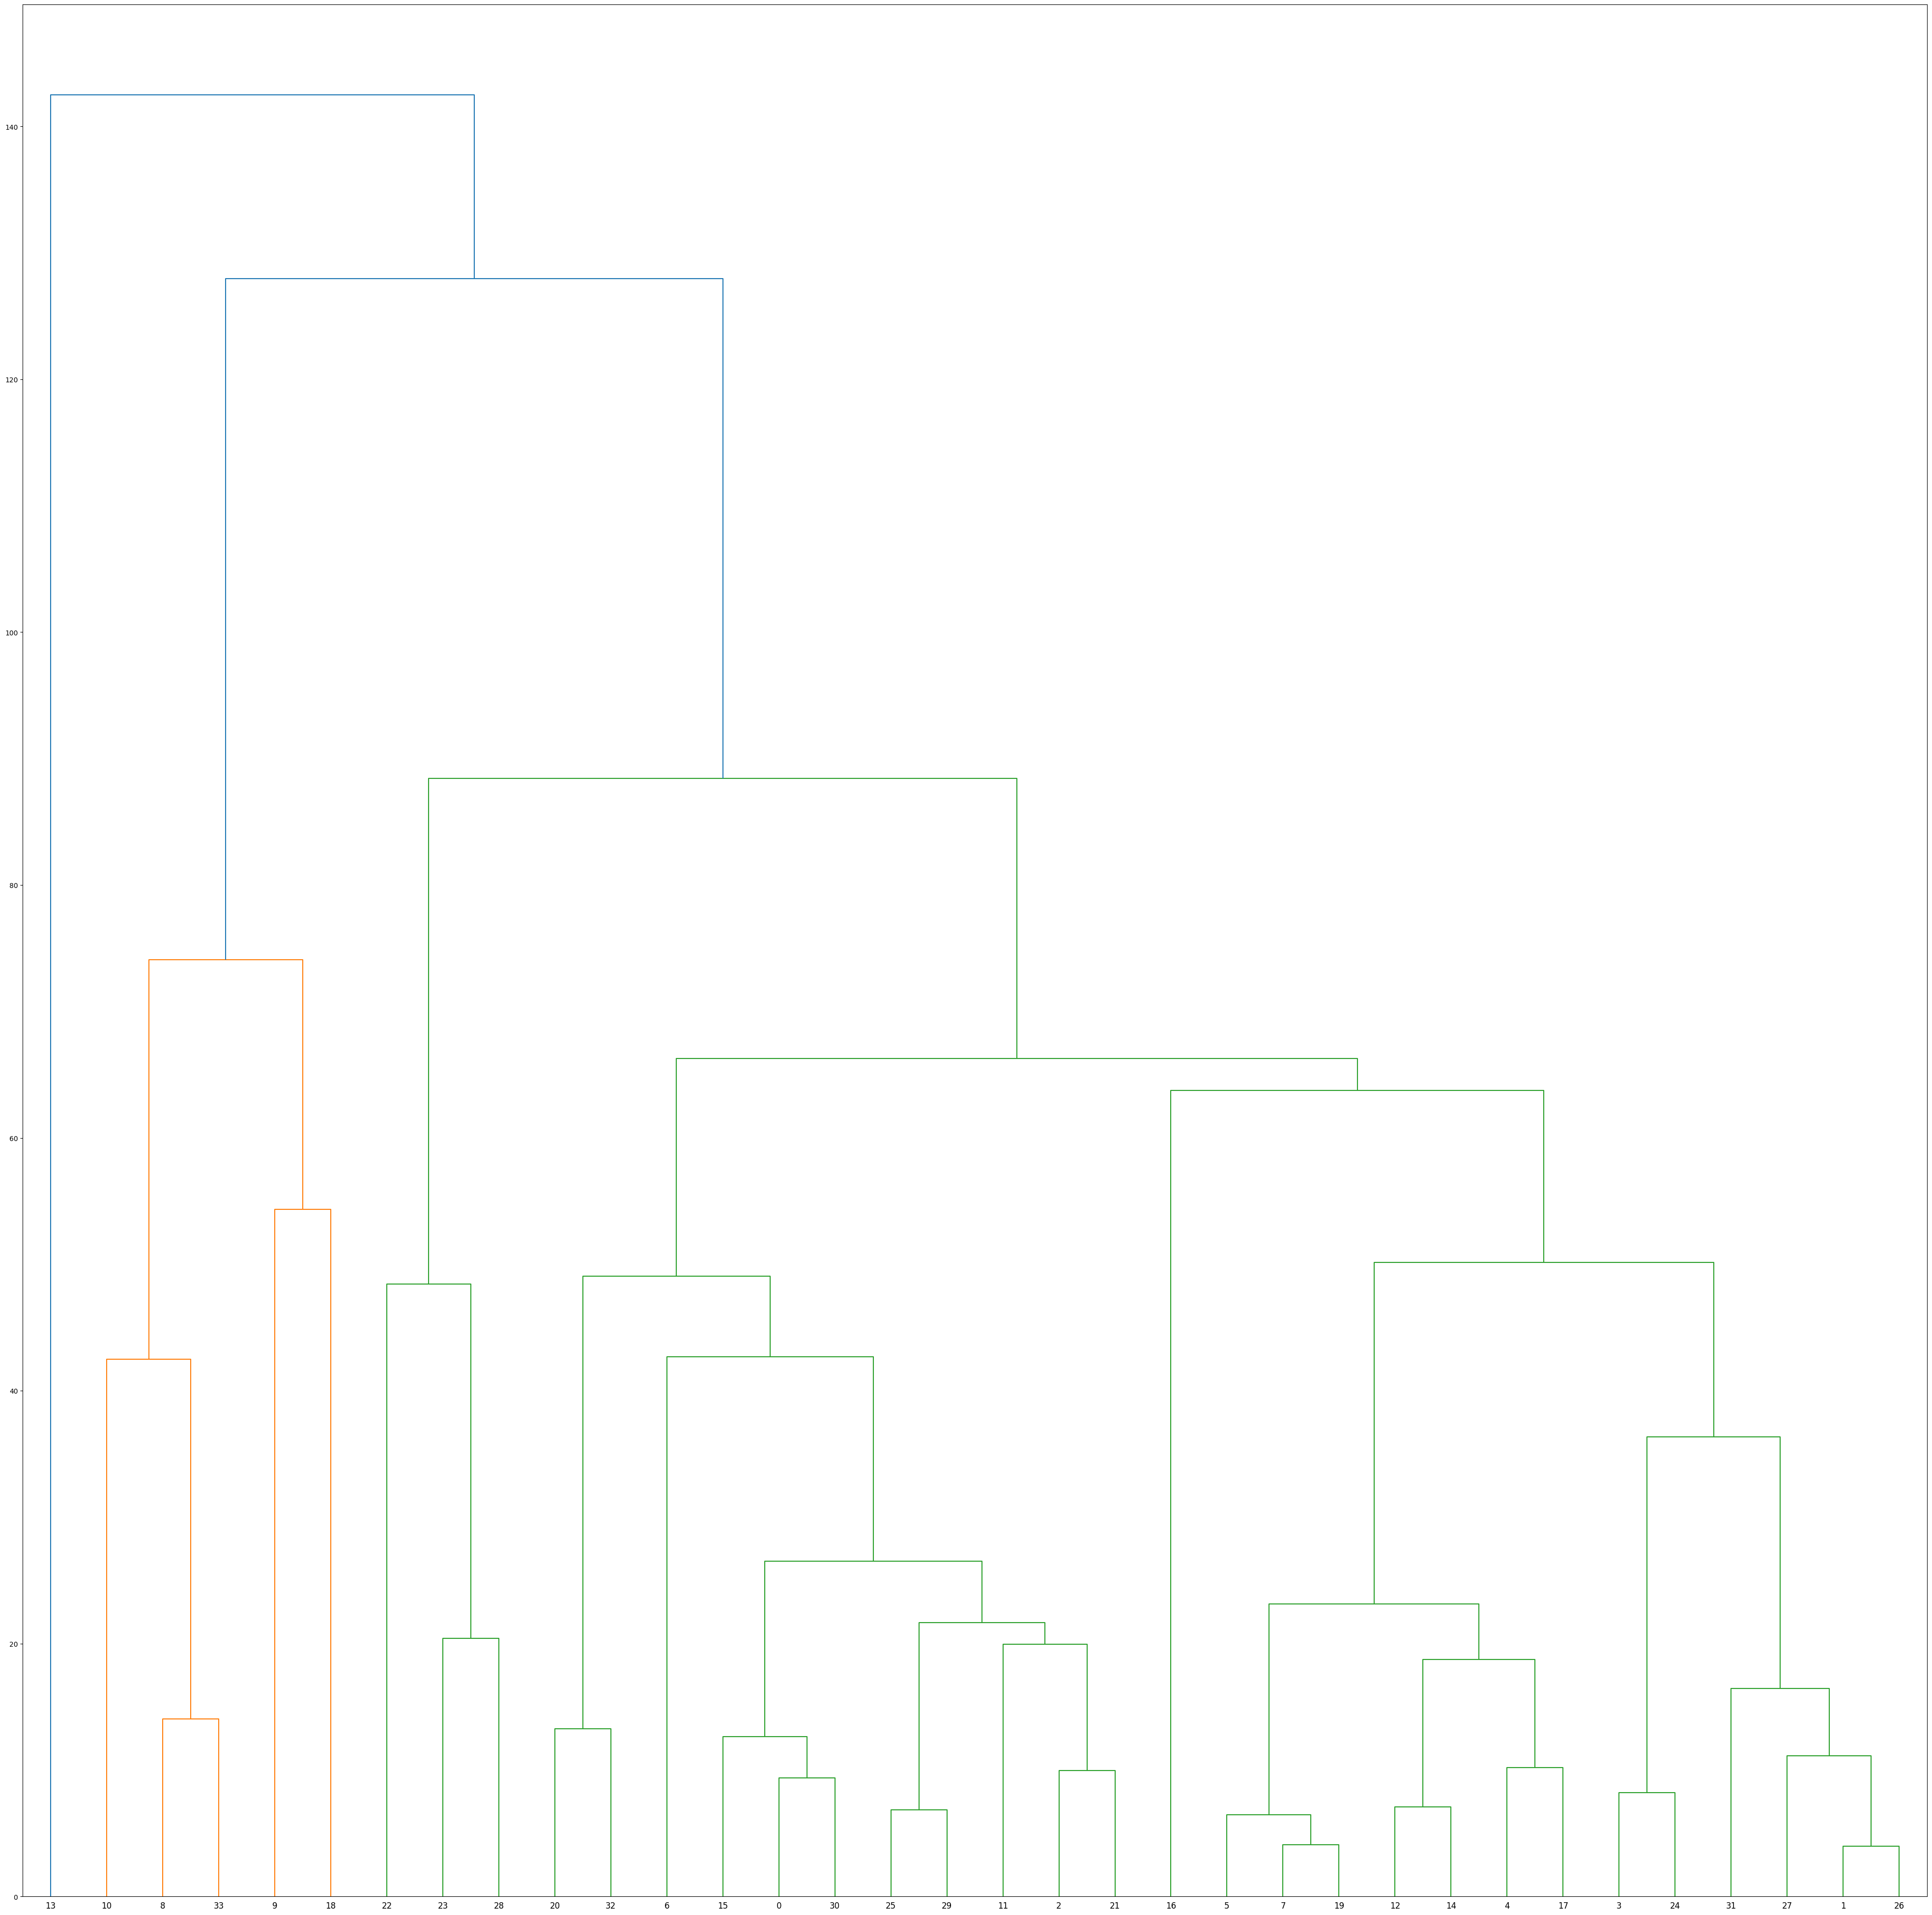

In [ ]:
# Membuat dendrogram
plt.figure(figsize=(50, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='top')
plt.show()

## **DBSCAN Clustering**

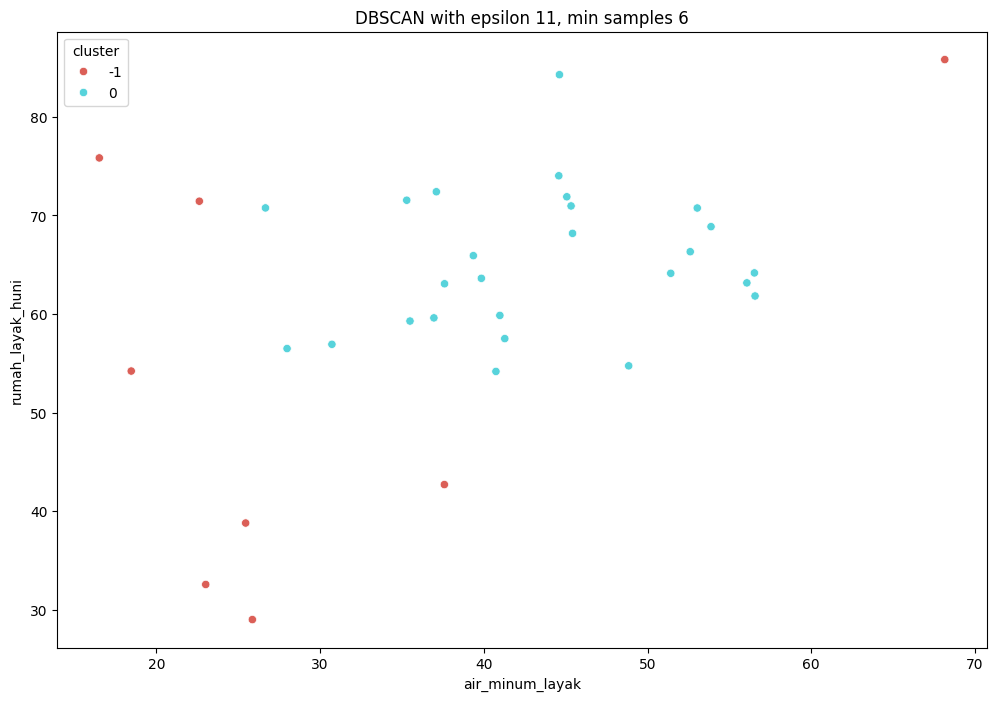

In [ ]:
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Membuat model DBSCAN
db = DBSCAN(eps=11, min_samples=6)
df['cluster'] = db.fit_predict(df[['air_minum_layak', 'rumah_layak_huni']])

# Plot klaster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='air_minum_layak', y='rumah_layak_huni', hue='cluster', palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()



In [ ]:
def describe_by_cluster(df, column):
    stats_by_cluster = df.groupby('cluster')[column].describe()
    return stats_by_cluster

# Menghitung statistik deskriptif untuk setiap klaster
stats = describe_by_cluster(df, 'air_minum_layak')
print(stats)


         count       mean        std    min     25%    50%      75%    max
cluster                                                                   
-1         8.0  29.707500  16.773395  16.51  21.580  24.23  28.7925  68.16
 0        26.0  43.230385   8.646660  26.66  37.225  42.93  50.7775  56.57


## **Silhoutte Analysis**

In [ ]:
from sklearn.metrics import silhouette_score

# K-Means
kmeans_silhouette = silhouette_score(df[['air_minum_layak', 'rumah_layak_huni']], kmeans.labels_)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Agglomerative Hierarchical
agglom_silhouette = silhouette_score(df[['air_minum_layak', 'rumah_layak_huni']], agglom.labels_)
print(f"Agglomerative Hierarchical Silhouette Score: {agglom_silhouette}")

# DBSCAN
dbscan_silhouette = silhouette_score(df[['air_minum_layak', 'rumah_layak_huni']], db.labels_)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


K-Means Silhouette Score: 0.39973121770735265
Agglomerative Hierarchical Silhouette Score: 0.3999881173698324
DBSCAN Silhouette Score: 0.402283913346451
